**Task 4: Location-Based Restaurant Analysis:\*
---



📈 City-Level Statistics:
            City  restaurant_count  avg_price_range  \
88     New Delhi              5473         1.621597   
50       Gurgaon              1118         1.855993   
89         Noida              1080         1.601852   
43     Faridabad               251         1.454183   
48     Ghaziabad                25         1.800000   
17  Bhubaneshwar                21         1.857143   
69       Lucknow                21         2.571429   
51      Guwahati                21         2.523810   
2      Ahmedabad                21         2.571429   
5       Amritsar                21         1.809524   

                                            Cuisines  
88                                      North Indian  
50                                      North Indian  
89                                      North Indian  
43                                      North Indian  
48                                              Cafe  
17                                     

/tmp/ipython-input-2173710792.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='restaurant_count', y='City', palette='viridis')


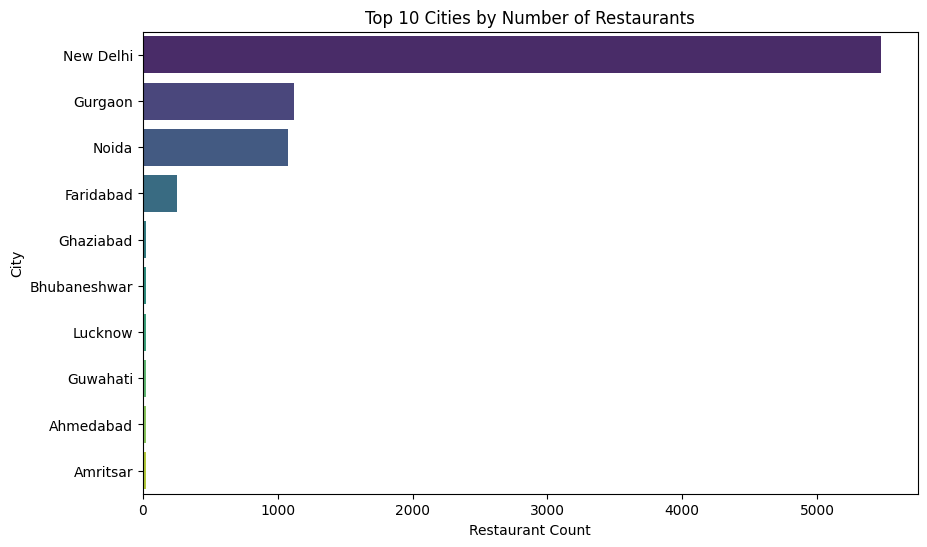

/tmp/ipython-input-2173710792.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='avg_price_range', y='City', palette='magma')


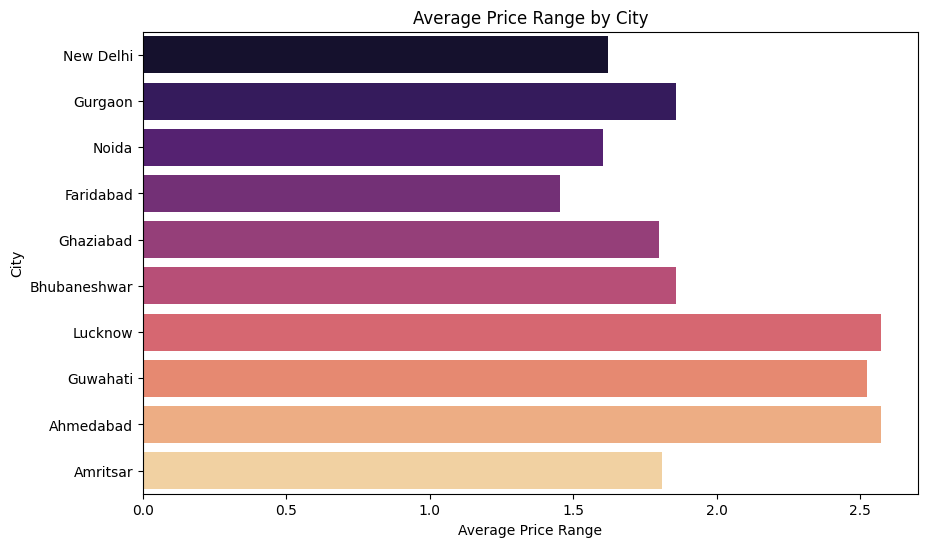


🔍 Insights:
🏙️ City with most restaurants: New Delhi (5473)
💰 Most affordable city: Clatskanie (Avg. Price Range: 1.00)
🍽️ Most common cuisine in New Delhi: North Indian


In [ ]:
# 📊 Task 4: Location-Based Restaurant Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("/content/Dataset .csv")

# Step 2: Handle missing values
df = df.dropna(subset=['City', 'Rating text'])  # keep only rows with valid city & rating
df['Price range'] = df['Price range'].fillna(df['Price range'].median())
df['Cuisines'] = df['Cuisines'].fillna("Unknown")

# Step 3: Group by city/locality and calculate statistics
city_stats = df.groupby('City').agg({
    'Restaurant Name': 'count',               # number of restaurants
    'Price range': 'mean',         # average price
}).reset_index().rename(columns={
    'Restaurant Name': 'restaurant_count',
    'Price range': 'avg_price_range'
})

# Step 4: Calculate most common cuisine per city
top_cuisine_per_city = (
    df.groupby(['City', 'Cuisines'])
    .size()
    .reset_index(name='count')
    .sort_values(['City', 'count'], ascending=[True, False])
    .drop_duplicates(subset=['City'])
)

# Merge cuisine info with city stats
city_stats = city_stats.merge(top_cuisine_per_city[['City', 'Cuisines']], on='City', how='left')

# Step 5: Sort by number of restaurants (top 10)
top_cities = city_stats.sort_values(by='restaurant_count', ascending=False).head(10)

# Display summary table
print("📈 City-Level Statistics:")
print(top_cities[['City', 'restaurant_count', 'avg_price_range', 'Cuisines']])

# Step 6: Visualize the findings

plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x='restaurant_count', y='City', palette='viridis')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Restaurant Count")
plt.ylabel("City")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x='avg_price_range', y='City', palette='magma')
plt.title("Average Price Range by City")
plt.xlabel("Average Price Range")
plt.ylabel("City")
plt.show()

# Step 7: Identify insights and patterns
highest_restaurant_count_city = city_stats.loc[city_stats['restaurant_count'].idxmax()]
lowest_price_city = city_stats.loc[city_stats['avg_price_range'].idxmin()]

print("\n🔍 Insights:")
print(f"🏙️ City with most restaurants: {highest_restaurant_count_city['City']} ({highest_restaurant_count_city['restaurant_count']})")
print(f"💰 Most affordable city: {lowest_price_city['City']} (Avg. Price Range: {lowest_price_city['avg_price_range']:.2f})")
print(f"🍽️ Most common cuisine in {highest_restaurant_count_city['City']}: {city_stats.loc[city_stats['City']==highest_restaurant_count_city['City'], 'Cuisines'].values[0]}")